In [3]:
import pandas as pd
import numpy as np
import os
import random
import re
import matplotlib.pyplot as plt

In [4]:
bakrep_metadata = pd.read_csv("data/bakrep-export_18112024.tsv",sep='\t', low_memory=False, index_col="#id")

In [10]:
bakrep_metadata.index.to_series().to_csv('data/all_genomes_661k.csv',header=False, index=False)

In [3]:
[tup for tup in zip(bakrep_metadata.columns, bakrep_metadata.dtypes)]

[('bakta.genome.genus', dtype('O')),
 ('bakta.genome.species', dtype('O')),
 ('bakta.genome.strain', dtype('O')),
 ('bakta.stats.no_sequences', dtype('float64')),
 ('bakta.stats.size', dtype('float64')),
 ('bakta.stats.gc', dtype('float64')),
 ('bakta.stats.n_ratio', dtype('float64')),
 ('bakta.stats.n50', dtype('float64')),
 ('bakta.stats.coding_ratio', dtype('float64')),
 ('gtdbtk.classification.domain', dtype('O')),
 ('gtdbtk.classification.phylum', dtype('O')),
 ('gtdbtk.classification.class', dtype('O')),
 ('gtdbtk.classification.order', dtype('O')),
 ('gtdbtk.classification.family', dtype('O')),
 ('gtdbtk.classification.genus', dtype('O')),
 ('gtdbtk.classification.species', dtype('O')),
 ('mlst.sequence_type', dtype('O')),
 ('checkm2.quality.completeness', dtype('float64')),
 ('checkm2.quality.contamination', dtype('float64')),
 ('metadata.accession', dtype('O')),
 ('metadata.collected_by', dtype('O')),
 ('metadata.collection_date', dtype('O')),
 ('metadata.country', dtype('O'))

In [4]:
bakrep_metadata[["metadata.accession"]]

,metadata.accession
#id,
SAMD00000344,SAMD00000344
SAMD00000345,SAMD00000345
SAMD00000355,SAMD00000355
SAMD00000550,SAMD00000550
SAMD00000552,SAMD00000552
...,...
SAMN10405967,SAMN10405967
SAMN10405968,SAMN10405968
SAMN10407504,SAMN10407504


In [5]:
def extract_prefix_and_number(s):
    match = re.match(r"([A-Z]+)(\d+)", s)
    if not match:
        return None, None
    return match.group(1), int(match.group(2))

def group_accessions_by_range(accessions):
    accessions = sorted(accessions, key=lambda x: extract_prefix_and_number(x))
    grouped = []

    i = 0
    while i < len(accessions):
        start = accessions[i]
        prefix, num = extract_prefix_and_number(start)
        j = i
        while j + 1 < len(accessions):
            next_prefix, next_num = extract_prefix_and_number(accessions[j + 1])
            if next_prefix == prefix and next_num == num + 1:
                j += 1
                num += 1
            else:
                break
        end = accessions[j]
        length = j - i + 1
        if i == j:
            grouped.append(([start], 1))
        else:
            grouped.append(([start, end], length))
        i = j + 1
    return grouped

# Example input
accessions = [
    "SAMD00000344", "SAMD00000345", "SAMD00000355", "SAMD00000550", 
    "SAMD00000552", "SAMN10407504", "SAMN10407505", "SAMN10407506"
]

# Run grouping
groups = group_accessions_by_range(accessions)

# Print results
for group in groups:
    print(group)

(['SAMD00000344', 'SAMD00000345'], 2)
(['SAMD00000355'], 1)
(['SAMD00000550'], 1)
(['SAMD00000552'], 1)
(['SAMN10407504', 'SAMN10407506'], 3)


In [6]:
groups_accession = group_accessions_by_range(bakrep_metadata.index)

In [7]:
groups_accession

[(['SAMD00000344', 'SAMD00000345'], 2),
 (['SAMD00000355'], 1),
 (['SAMD00000550'], 1),
 (['SAMD00000552'], 1),
 (['SAMD00000562'], 1),
 (['SAMD00000572'], 1),
 (['SAMD00000584', 'SAMD00000585'], 2),
 (['SAMD00000605'], 1),
 (['SAMD00000611', 'SAMD00000612'], 2),
 (['SAMD00000644'], 1),
 (['SAMD00000649'], 1),
 (['SAMD00000652'], 1),
 (['SAMD00000665', 'SAMD00000667'], 3),
 (['SAMD00000669'], 1),
 (['SAMD00000692'], 1),
 (['SAMD00000699'], 1),
 (['SAMD00000724'], 1),
 (['SAMD00000754'], 1),
 (['SAMD00000756', 'SAMD00000760'], 5),
 (['SAMD00000768'], 1),
 (['SAMD00000798'], 1),
 (['SAMD00000806'], 1),
 (['SAMD00000812'], 1),
 (['SAMD00000816'], 1),
 (['SAMD00002586', 'SAMD00002593'], 8),
 (['SAMD00002642'], 1),
 (['SAMD00002680', 'SAMD00002681'], 2),
 (['SAMD00002684'], 1),
 (['SAMD00002686'], 1),
 (['SAMD00002690', 'SAMD00002691'], 2),
 (['SAMD00002693'], 1),
 (['SAMD00002695'], 1),
 (['SAMD00002788', 'SAMD00002789'], 2),
 (['SAMD00002791'], 1),
 (['SAMD00002802'], 1),
 (['SAMD00002818

In [8]:
# Convert to DataFrame
rows = []
for group, length in groups_accession:
    if len(group) == 1:
        start = end = group[0]
    else:
        start, end = group
    rows.append({"start": start, "end": end, "length": length})

df_range = pd.DataFrame(rows)
print(df_range)

              start           end  length
0      SAMD00000344  SAMD00000345       2
1      SAMD00000355  SAMD00000355       1
2      SAMD00000550  SAMD00000550       1
3      SAMD00000552  SAMD00000552       1
4      SAMD00000562  SAMD00000562       1
...             ...           ...     ...
64228  SAMN10405316  SAMN10405316       1
64229  SAMN10405960  SAMN10405962       3
64230  SAMN10405964  SAMN10405968       5
64231  SAMN10407504  SAMN10407505       2
64232  SAMN10407507  SAMN10407507       1

[64233 rows x 3 columns]


In [12]:
df_range[df_range['length']>=1]

,start,end,length
0,SAMD00000344,SAMD00000345,2
1,SAMD00000355,SAMD00000355,1
2,SAMD00000550,SAMD00000550,1
3,SAMD00000552,SAMD00000552,1
4,SAMD00000562,SAMD00000562,1
...,...,...,...
64228,SAMN10405316,SAMN10405316,1
64229,SAMN10405960,SAMN10405962,3
64230,SAMN10405964,SAMN10405968,5
64231,SAMN10407504,SAMN10407505,2


In [16]:
df_range[df_range['length']>=1]['end'].to_csv('data/end_of_accession_range.csv')

In [28]:
values = df_range[df_range['length']>=1]['end']
set_species = set([])
for v in values:
    set_species.add(bakrep_metadata.loc[v]['gtdbtk.classification.species'])

In [30]:
len(set_species)

3456

In [43]:
def check_species_consistency(groups, original_df):
    """
    Check if all accessions in each group belong to the same species.

    Args:
        groups (list): List of tuples like ([start, end], length).
        original_df (pd.DataFrame): DataFrame with 'accession' and 'species' columns.

    Returns:
        list of dicts: Each dict includes start, end, length, consistent (bool), and species (if consistent).
    """
    result = []
    
    # Set index to accession for fast lookup
    df = original_df
    total = len(groups)
    current=1
    for group, length in groups:
        print(current,'/',total)
        current+=1
        # Expand group: from [start, end] get all accessions between them (inclusive)
        if len(group) == 1:
            accessions = [group[0]]
        else:
            start, end = group
            # Get all accession names in order from the original dataframe
            all_accessions = df.index.tolist()
            try:
                i = all_accessions.index(start)
                j = all_accessions.index(end)
                if i > j:
                    i, j = j, i
                accessions = all_accessions[i:j+1]
            except ValueError:
                accessions = group  # fallback if not found

        species_in_group = df.loc[accessions]['gtdbtk.classification.species'].unique()
        if len(species_in_group) == 1:
            consistent = True
            species = species_in_group[0]
        else:
            consistent = False
            species = None

        result.append({
            "start": group[0],
            "end": group[-1],
            "length": length,
            "consistent": consistent,
            "species": species
        })

    return pd.DataFrame(result)

In [45]:
df_consistency =  check_species_consistency(groups_accession,bakrep_metadata)

1 / 64233
2 / 64233
3 / 64233
4 / 64233
5 / 64233
6 / 64233
7 / 64233
8 / 64233
9 / 64233
10 / 64233
11 / 64233
12 / 64233
13 / 64233
14 / 64233
15 / 64233
16 / 64233
17 / 64233
18 / 64233
19 / 64233
20 / 64233
21 / 64233
22 / 64233
23 / 64233
24 / 64233
25 / 64233
26 / 64233
27 / 64233
28 / 64233
29 / 64233
30 / 64233
31 / 64233
32 / 64233
33 / 64233
34 / 64233
35 / 64233
36 / 64233
37 / 64233
38 / 64233
39 / 64233
40 / 64233
41 / 64233
42 / 64233
43 / 64233
44 / 64233
45 / 64233
46 / 64233
47 / 64233
48 / 64233
49 / 64233
50 / 64233
51 / 64233
52 / 64233
53 / 64233
54 / 64233
55 / 64233
56 / 64233
57 / 64233
58 / 64233
59 / 64233
60 / 64233
61 / 64233
62 / 64233
63 / 64233
64 / 64233
65 / 64233
66 / 64233
67 / 64233
68 / 64233
69 / 64233
70 / 64233
71 / 64233
72 / 64233
73 / 64233
74 / 64233
75 / 64233
76 / 64233
77 / 64233
78 / 64233
79 / 64233
80 / 64233
81 / 64233
82 / 64233
83 / 64233
84 / 64233
85 / 64233
86 / 64233
87 / 64233
88 / 64233
89 / 64233
90 / 64233
91 / 64233
92 / 642

In [55]:
df_consistency[df_consistency['length']>2]

,start,end,length,consistent,species
12,SAMD00000665,SAMD00000667,3,True,Bacillus subtilis
18,SAMD00000756,SAMD00000760,5,False,None
24,SAMD00002586,SAMD00002593,8,False,None
71,SAMD00003784,SAMD00003793,10,True,Salmonella enterica
74,SAMD00003829,SAMD00003833,5,True,Bacillus subtilis
...,...,...,...,...,...
64222,SAMN10397460,SAMN10397467,8,True,Salmonella enterica
64223,SAMN10397930,SAMN10397952,23,False,None
64227,SAMN10405199,SAMN10405215,17,True,Salmonella enterica
64229,SAMN10405960,SAMN10405962,3,True,Salmonella enterica


In [87]:
df_consistency[df_consistency['length']>2000].groupby('consistent').size()

consistent
True    1
dtype: int64

In [90]:
lengths = set(df_consistency['length'])
lengths

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [106]:
values = df_consistency[df_consistency['length']>1].groupby('consistent').size()
if False in values.index:
    print('hahaha')

hahaha


In [150]:
consistency_per_length = df_consistency[df_consistency['length']>=1].groupby(['length','consistent']).size()
consistency_per_length

length  consistent
1       True          34293
2       False          1685
        True           3920
3       False           884
        True           2108
                      ...  
987     False             1
1046    False             1
1067    False             1
1108    False             1
2385    True              1
Length: 672, dtype: int64

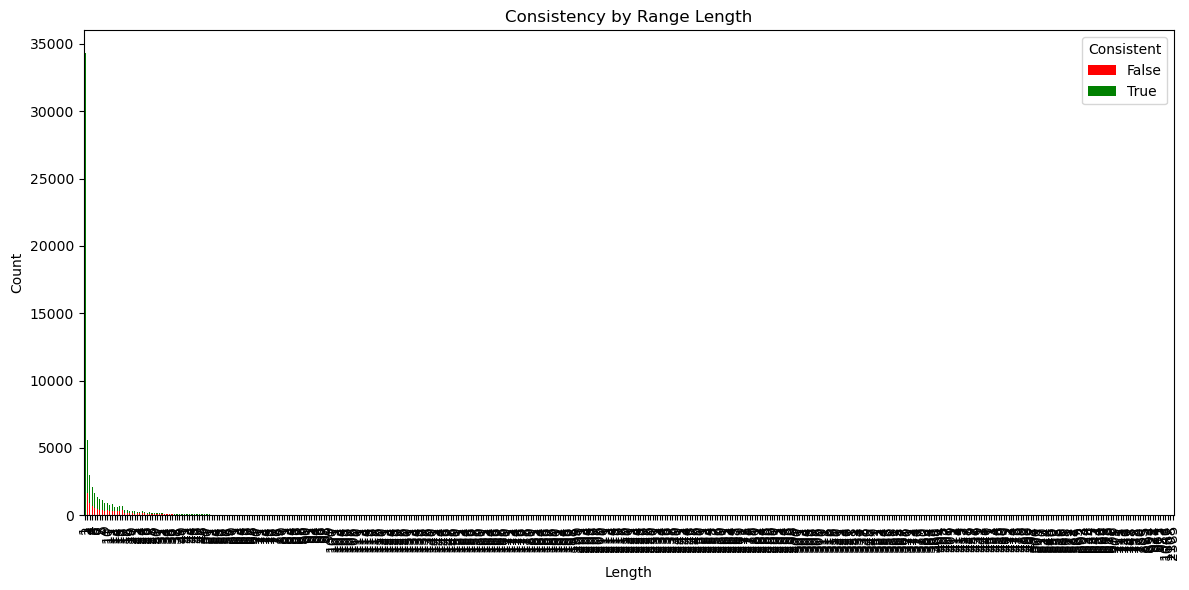

In [125]:
# Assuming `s` is your Series
df = consistency_per_length.unstack(fill_value=0)  # Turns the (length, consistent) Series into a DataFrame

# Sort by length for better readability
df = df.sort_index()

# Plot
df.plot(kind='bar', stacked=True, figsize=(12, 6), color={True: 'green', False: 'red'})

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Consistency by Range Length')
plt.legend(title='Consistent')
plt.tight_layout()
plt.show()


/var/folders/wc/cwdkw_2j08vd3c_wq6wzy68jjjljpb/T/ipykernel_19801/1633542585.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('length_bin')[[False, True]].sum()


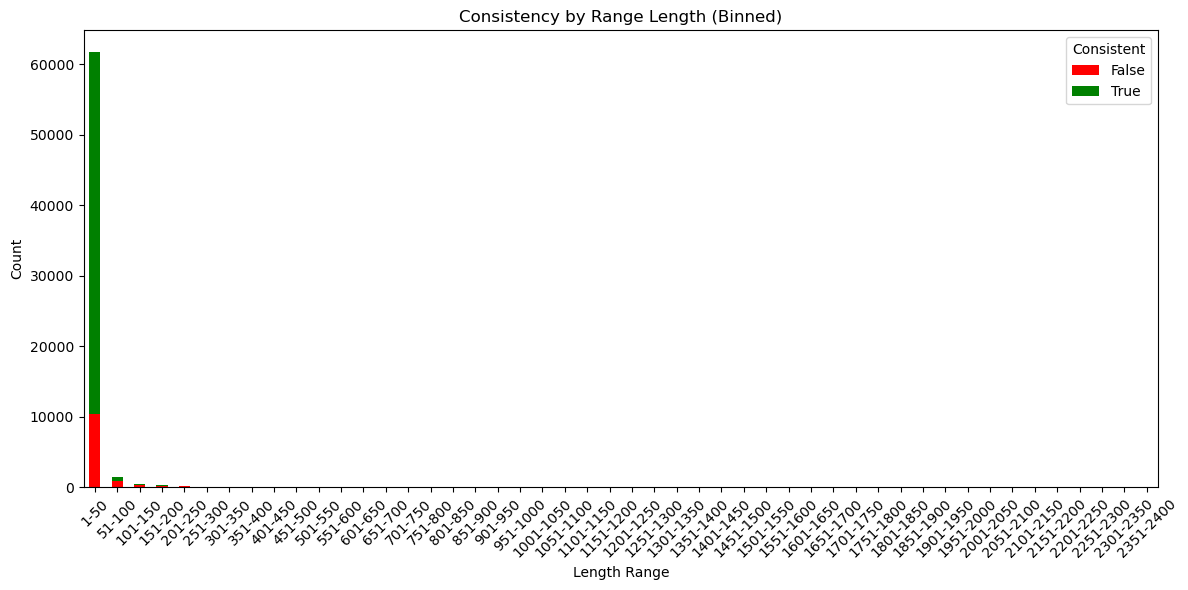

In [126]:
# Example: assume `s` is your original Series with MultiIndex (length, consistent)
# Step 1: Convert to DataFrame
df = consistency_per_length.unstack(fill_value=0).reset_index()  # 'length' becomes a column
df.columns.name = None  # remove any column index name if present

# Step 2: Bin the 'length' column
bin_width = 50
max_length = df['length'].max()
bins = range(1, max_length + bin_width, bin_width)
labels = [f"{start}-{start + bin_width - 1}" for start in bins[:-1]]
df['length_bin'] = pd.cut(df['length'], bins=bins, labels=labels, right=False)

# Step 3: Group by bin and sum counts
grouped = df.groupby('length_bin')[[False, True]].sum()

# Step 4: Plot stacked bar plot
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color={True: 'green', False: 'red'})

plt.xlabel('Length Range')
plt.ylabel('Count')
plt.title('Consistency by Range Length (Binned)')
plt.legend(title='Consistent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


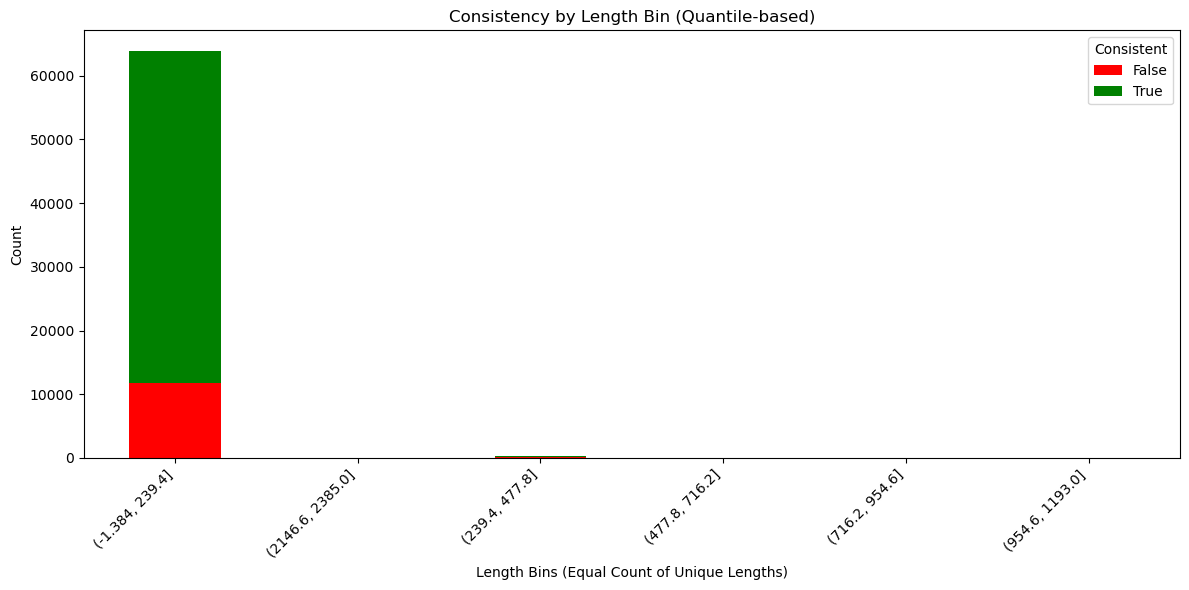

0       (-1.384, 239.4]
1       (-1.384, 239.4]
2       (-1.384, 239.4]
3       (-1.384, 239.4]
4       (-1.384, 239.4]
             ...       
433     (954.6, 1193.0]
434     (954.6, 1193.0]
435     (954.6, 1193.0]
436     (954.6, 1193.0]
437    (2146.6, 2385.0]
Name: length, Length: 438, dtype: category
Categories (10, interval[float64, right]): [(-1.384, 239.4] < (239.4, 477.8] < (477.8, 716.2] < (716.2, 954.6] ... (1431.4, 1669.8] < (1669.8, 1908.2] < (1908.2, 2146.6] < (2146.6, 2385.0]]

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `s` is your original Series with MultiIndex (length, consistent)
df = consistency_per_length.unstack(fill_value=0).reset_index()
df.columns.name = None

# Number of bins you want
n_bins = 10

# Get quantile-based bins for the 'length' column
# Drop duplicates first to avoid issues with qcut
unique_lengths = df['length'].drop_duplicates().sort_values()

# Quantile-based bins (use cut instead of qcut to avoid potential issues with duplicates)
length_bins = pd.cut(unique_lengths, bins=n_bins)

# Map lengths to their bins
bin_labels = {length: str(bin) for length, bin in zip(unique_lengths, length_bins)}
df['length_bin'] = df['length'].map(bin_labels)

# Group and sum counts
grouped = df.groupby('length_bin')[[False, True]].sum()

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color={True: 'green', False: 'red'})

plt.xlabel('Length Bins (Equal Count of Unique Lengths)')
plt.ylabel('Count')
plt.title('Consistency by Length Bin (Quantile-based)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Consistent')
plt.tight_layout()
plt.show()
length_bins

In [151]:
consistency_per_length

length  consistent
1       True          34293
2       False          1685
        True           3920
3       False           884
        True           2108
                      ...  
987     False             1
1046    False             1
1067    False             1
1108    False             1
2385    True              1
Length: 672, dtype: int64

In [160]:
# Assume the series `s` is already defined as shown
# Group by 'length' and calculate the ratio of True values for each length
true_ratio = {}

for l in consistency_per_length.index:
    print(l)

(1, True)
(2, False)
(2, True)
(3, False)
(3, True)
(4, False)
(4, True)
(5, False)
(5, True)
(6, False)
(6, True)
(7, False)
(7, True)
(8, False)
(8, True)
(9, False)
(9, True)
(10, False)
(10, True)
(11, False)
(11, True)
(12, False)
(12, True)
(13, False)
(13, True)
(14, False)
(14, True)
(15, False)
(15, True)
(16, False)
(16, True)
(17, False)
(17, True)
(18, False)
(18, True)
(19, False)
(19, True)
(20, False)
(20, True)
(21, False)
(21, True)
(22, False)
(22, True)
(23, False)
(23, True)
(24, False)
(24, True)
(25, False)
(25, True)
(26, False)
(26, True)
(27, False)
(27, True)
(28, False)
(28, True)
(29, False)
(29, True)
(30, False)
(30, True)
(31, False)
(31, True)
(32, False)
(32, True)
(33, False)
(33, True)
(34, False)
(34, True)
(35, False)
(35, True)
(36, False)
(36, True)
(37, False)
(37, True)
(38, False)
(38, True)
(39, False)
(39, True)
(40, False)
(40, True)
(41, False)
(41, True)
(42, False)
(42, True)
(43, False)
(43, True)
(44, False)
(44, True)
(45, False)
(45, 

In [159]:
# Assume s is your original Series with MultiIndex (length, consistent)
# First, group by the 'length' index level, then calculate the ratio of True values

true_ratio = consistency_per_length.groupby('length').groups

# Display the result
print(true_ratio)

{1: [(1, True)], 2: [(2, False), (2, True)], 3: [(3, False), (3, True)], 4: [(4, False), (4, True)], 5: [(5, False), (5, True)], 6: [(6, False), (6, True)], 7: [(7, False), (7, True)], 8: [(8, False), (8, True)], 9: [(9, False), (9, True)], 10: [(10, False), (10, True)], 11: [(11, False), (11, True)], 12: [(12, False), (12, True)], 13: [(13, False), (13, True)], 14: [(14, False), (14, True)], 15: [(15, False), (15, True)], 16: [(16, False), (16, True)], 17: [(17, False), (17, True)], 18: [(18, False), (18, True)], 19: [(19, False), (19, True)], 20: [(20, False), (20, True)], 21: [(21, False), (21, True)], 22: [(22, False), (22, True)], 23: [(23, False), (23, True)], 24: [(24, False), (24, True)], 25: [(25, False), (25, True)], 26: [(26, False), (26, True)], 27: [(27, False), (27, True)], 28: [(28, False), (28, True)], 29: [(29, False), (29, True)], 30: [(30, False), (30, True)], 31: [(31, False), (31, True)], 32: [(32, False), (32, True)], 33: [(33, False), (33, True)], 34: [(34, False